<center><font size=6><b> 强化学习作业3代码题</b></font><center>
<center><br \><font size=4><b> 18300290007 加兴华</b></font><center>

复现下图   
![image.png](https://s2.loli.net/2023/01/02/m7NSRkyfWezE694.png)

In [1]:
import numpy as np
import random
## 模型参数
### action坐标分解及名称列表
dx = [-1, 0, 1, 0, 0]
dy = [0, -1, 0, 1, 0]
acts = ['up  ', 'left', 'down', 'right', 'stay']
arrow= ['↑','←','↓','→','-']

### reward函数
H, W = (10, 10)
reward = np.zeros([H, W])
obstacles = [(4, 1), (6, 3), (1, 8), (6, 8), (8, 6)]
target = [(7, 6)]
for x, y in obstacles:
    reward[x, y] = -10
for x, y in target:
    reward[x, y] = 10

np.random.seed(10086)
random.seed(10086)

In [63]:
import numpy as np
import random
import tqdm

def Qlearning(times=1000,gamma=0.9,epsilon0=0.3,meanS=[]):
    '''
    [Inputs]:
    times           重复次数
    gamma           衰减率
    epsilon0        初始的探索概率
    meanS           计算状态值均值的坐标列表
    [Outputs]:
    pi              策略矩阵
    Q               动作值3维矩阵
    avgL            每轮学习后平均状态值的列表
    '''
    ## 初始化相关矩阵 
    Q=np.zeros((len(acts),H,W))   ### |A|个块，每块H行W列
    N=np.zeros((len(acts),H,W))
    pi=np.random.randint(0,5,(H,W))  ### 策略矩阵初始化
    pi[np.array(target)[:,0],np.array(target)[:,1]]=4  ### 终点不动
    avgL=[]

    for k in tqdm.tqdm(range(times)):
        ## 采样轨道
        epsilon=epsilon0
        s0=(random.randint(0, H-1), random.randint(0, W-1))
        episode=[s0]
        while episode[-1] not in target:
            s_now=episode[-1]
            ### egreedy
            if random.uniform(0, 1) < epsilon:  
                a=random.randint(0, 4)
            else:                               
                a=np.int8(pi[s_now])
            episode.append(a)
            s_next=(s_now[0]+dx[a],s_now[1]+dy[a])
            if not (0<=s_next[0]<=H-1 and 0<=s_next[1]<=W-1):
                s_next=s_now
                r=0
            else:
                r=reward[s_next]
            episode.append(r)
            episode.append(s_next)

        ## 更新
        state=episode[-4:0:-3]
        r=episode[-2:2:-3]
        a=episode[-3:1:-3]
        alpha=0.1
        for t in range(0,len(state)):
            x,y=state[t][0],state[t][1]
            x_next,y_next=episode[-1-t*3][0],episode[-1-t*3][1]
            Q[a[t],x,y] += alpha*(r[t]+gamma*Q[pi[x_next,y_next],x_next,y_next]-Q[a[t],x,y])
            if Q[a[t],x,y] > Q[int(pi[x,y]),x,y]:
                pi[x,y] = a[t]
        
        ## 计算平均状态值
        v=Q.max(axis=0)
        avg=v[np.array(meanS)].mean()
        avgL.append(avg)
    return pi,Q,avgL

def SARSA(times=1000,gamma=0.9,epsilon0=0.3,meanS=[]):
    '''
    [Inputs]:
    times           重复次数
    gamma           衰减率
    epsilon0        初始的探索概率
    meanS           计算状态值均值的坐标列表
    [Outputs]:
    pi              策略矩阵
    Q               动作值3维矩阵
    avgL            每轮学习后平均状态值的列表
    '''
    ## 初始化相关矩阵 
    Q=np.zeros((len(acts),H,W))   ### |A|个块，每块H行W列
    N=np.zeros((len(acts),H,W))
    pi=np.random.randint(0,5,(H,W))  ### 策略矩阵初始化
    pi[np.array(target)[:,0],np.array(target)[:,1]]=4  ### 终点不动
    avgL=[]

    for k in tqdm.tqdm(range(times)):
        ## 采样轨道
        epsilon=epsilon0
        s0=(random.randint(0, H-1), random.randint(0, W-1))
        episode=[s0]
        while episode[-1] not in target:
            s_now=episode[-1]
            ### egreedy
            if random.uniform(0, 1) < epsilon:  
                a=random.randint(0, 4)
            else:                               
                a=np.int8(pi[s_now])
            episode.append(a)
            s_next=(s_now[0]+dx[a],s_now[1]+dy[a])
            if not (0<=s_next[0]<=H-1 and 0<=s_next[1]<=W-1):
                s_next=s_now
                r=0
            else:
                r=reward[s_next]
            episode.append(r)
            episode.append(s_next)

        ## 更新
        state=episode[-4:0:-3]
        r=episode[-2:2:-3]
        a=episode[-3:1:-3]
        alpha=0.1
        for t in range(0,len(state)):
            x,y=state[t][0],state[t][1]
            x_next,y_next=episode[-1-t*3][0],episode[-1-t*3][1]
            a_next=episode[-t*3] if t!=0 else 4
            Q[a[t],x,y] += alpha*(r[t]+gamma*Q[a_next,x_next,y_next]-Q[a[t],x,y])
            if Q[a[t],x,y] > Q[int(pi[x,y]),x,y]:
                pi[x,y] = a[t]
        
        ## 计算平均状态值
        v=Q.max(axis=0)
        avg=v[np.array(meanS)].mean()
        avgL.append(avg)
    return pi,Q,avgL


In [75]:
cs=[]
gamma=0.9
while True:
    if len(cs)==10:
        break
    x0, y0 = (random.randint(0, 9), random.randint(0, 9))
    if (x0, y0) not in cs:
        cs.append((x0,y0))

_,_,q1=Qlearning(10000,gamma,epsilon0=0.1,meanS=cs)
_,_,s1=SARSA(10000,gamma,epsilon0=0.1,meanS=cs)
_,_,q5=Qlearning(10000,gamma,epsilon0=0.5,meanS=cs)
_,_,s5=SARSA(10000,gamma,epsilon0=0.5,meanS=cs)
_,_,q10=Qlearning(10000,gamma,epsilon0=1,meanS=cs)
_,_,s10=SARSA(10000,gamma,epsilon0=1,meanS=cs)

100%|██████████| 10000/10000 [00:18<00:00, 553.70it/s]


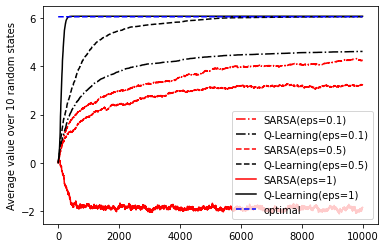

In [81]:
import matplotlib.pyplot as plt
t=range(10000)
plt.plot(t,s1,'-.',color='r',label='SARSA(eps=0.1)')
plt.plot(t,q1,'-.',color='black',label='Q-Learning(eps=0.1)')
plt.plot(t,s5,'--',color='r',label='SARSA(eps=0.5)')
plt.plot(t,q5,'--',color='black',label='Q-Learning(eps=0.5)')
plt.plot(t,s10,'-',color='r',label='SARSA(eps=1)')
plt.plot(t,q10,'-',color='black',label='Q-Learning(eps=1)')
plt.plot(t,[max(q5) for i in t],linestyle='--',color='b',label='optimal')
plt.ylabel('Average value over 10 random states')
plt.legend()
plt.show()